# Week5 - Logistic Regression Assignment

- Run the below cells.
- Complete all of the numbered questions. You may call any packages that we've used in class.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/log_reg/employee-turnover-balanced.csv')
#using head() function to get the top rows information 
df.head()

,left_company,age,frequency_of_travel,department,commuting_distance,education,satisfaction_with_environment,gender,seniority_level,position,satisfaction_with_job,married_or_single,last_raise_pct,last_performance_rating,total_years_working,years_at_company,years_in_current_job,years_since_last_promotion,years_with_current_supervisor
0,No,37,Travel_Rarely,Sales,16,4,4,Male,2,Sales Executive,3,Divorced,19,3,9,1,0,0,0
1,No,39,Travel_Rarely,Research & Development,3,2,3,Male,2,Laboratory Technician,3,Divorced,15,3,11,10,8,0,7
2,No,52,Travel_Frequently,Research & Development,25,4,3,Female,4,Manufacturing Director,4,Married,22,4,31,9,8,0,0
3,No,50,Non-Travel,Sales,1,3,4,Female,2,Sales Executive,3,Married,12,3,19,18,7,0,13
4,No,44,Travel_Rarely,Research & Development,4,3,4,Male,2,Healthcare Representative,2,Single,12,3,10,5,2,2,3


## Data Definitions
- `left_company`: Whether individual left the company or not. This is the target variable.  
- `age`: Age of individual. 
- `frequency_of_travel`: How often person travels for work.  
- `department`: Department person works(worked).  
- `commuting_distance`: Distance person lives from office.  
- `education`: Highest education category.  
- `satisfaction_with_environment`: Satisfaction of environment, on lickert scale.  
- `gender`: Gender of individual.  
- `seniority_level`: Seniority level of individual.  
- `position`: Last position held at the company.  
- `satisfaction_with_job`: Satisfaction of their job, on lickert scale.  
- `married_or_single`: Marital status of person.  
- `last_raise_pct`: Percent increase their last raise represented.  
- `last_performance_rating`: Most recent annual performance rating, on lickert scale.  
- `total_years_working`: Number of years the individual has spent working in their career.  
- `years_at_company`: Number of years the individual has been at the company, regardless of position.  
- `years_in_current_job`: Number of years the individual has been in their current position.  
- `years_since_last_promotion`: Years since the person had their last promotion.  
- `years_with_current_supervisor`: Years the person has had their current supervisor.

# Question 1
- What is the distribution of the target (`left_company`)?  
- Do you have any concerns on class imbalances?

In [2]:
#using the value_counts feature to count yes or no values
x=df['left_company'].value_counts()
print(x)

No     500
Yes    500
Name: left_company, dtype: int64


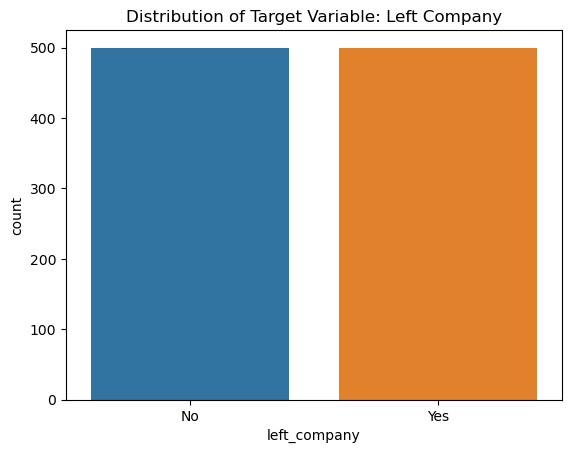

In [3]:
df['left_company'].value_counts(normalize=True) * 100

#plotting the distribution
sns.countplot(x='left_company', data=df)
plt.title('Distribution of Target Variable: Left Company')
plt.show()

# Interpretation
The left_company has two values Yes and No.
Thes are equally distributed hence there will no bias.

# Question 2
- Do a quick EDA
- Can you create new features that captures the relation with the target better?

In [4]:
df.shape

(1000, 19)

In [5]:
df.dtypes

left_company                     object
age                               int64
frequency_of_travel              object
department                       object
commuting_distance                int64
education                         int64
satisfaction_with_environment     int64
gender                           object
seniority_level                   int64
position                         object
satisfaction_with_job             int64
married_or_single                object
last_raise_pct                    int64
last_performance_rating           int64
total_years_working               int64
years_at_company                  int64
years_in_current_job              int64
years_since_last_promotion        int64
years_with_current_supervisor     int64
dtype: object

All the data types in correctformat and do not need any changes 

In [6]:
#using isna and sum function to club the null values to get an idea of null values
df.isna().sum()

left_company                     0
age                              0
frequency_of_travel              0
department                       0
commuting_distance               0
education                        0
satisfaction_with_environment    0
gender                           0
seniority_level                  0
position                         0
satisfaction_with_job            0
married_or_single                0
last_raise_pct                   0
last_performance_rating          0
total_years_working              0
years_at_company                 0
years_in_current_job             0
years_since_last_promotion       0
years_with_current_supervisor    0
dtype: int64

In [23]:
#Creating a new feature  'total_satisfaction' that combines both the job and environment satisfication to get an idea of how the overall impact is.
#example some people might have hectic work and good helping environment which could make an overall average work experience 
df['total_satisfaction'] = df['satisfaction_with_job'] + df['satisfaction_with_environment']


# Interpretation:
1. The data has 1000 rows and 19columns
2. The data is in correct format so that we can work with them 
3. New feature-'total_satisfaction' that combines both the job and environment satisfication to get an idea of how the overall impact is.example some people might have hectic work and good helping environment which could make an overall work experience  feature 


# Question 3
- Create and print a list of the variables that you would treat as numerical and another list for the variables that you would treat as categorical.  
- Explain your choices.

In [59]:
# #creating numerical variables list. numerical_vars = []
numerical_vars = [
    'age',
    'commuting_distance',
    'education',
    'satisfaction_with_environment',
    'satisfaction_with_job',
    'last_raise_pct',
    'last_performance_rating',
    'total_years_working',
    'years_at_company',
    'years_in_current_job',
    'years_since_last_promotion',
        'years_with_current_supervisor',
    'total_satisfaction'
]
print("Numerical Variables:", numerical_vars)



Numerical Variables: ['age', 'commuting_distance', 'education', 'satisfaction_with_environment', 'satisfaction_with_job', 'last_raise_pct', 'last_performance_rating', 'total_years_working', 'years_at_company', 'years_in_current_job', 'years_since_last_promotion', 'years_with_current_supervisor', 'total_satisfaction']


In [60]:
#creating categorical variables list 
# categorical_Vars = []
categorical_vars = [
    'frequency_of_travel',    
    'department',             
    'gender',                 
    'seniority_level',        
    'position',               
    'married_or_single'       
]
print("Categorical Variables:", categorical_vars)

Categorical Variables: ['frequency_of_travel', 'department', 'gender', 'seniority_level', 'position', 'married_or_single']


# Interpretation/Summary:

Numerical Variables: ['age', 'commuting_distance', 'education', 'satisfaction_with_environment', 'satisfaction_with_job', 'last_raise_pct', 'last_performance_rating', 'total_years_working', 'years_at_company', 'years_in_current_job', 'years_since_last_promotion', 'years_with_current_supervisor', 'total_satisfaction'] 

The above features were chosen because these could certainly be a considering factor before leaving a job. Some feature explanations are:

1. Age- can be a factor. If someone is in their 40s or 50s they might consider retiring or else could seek professional growth
2. Distance- People sometimes dont want to travel long distances everyday.
3. last raise- people can be dissatisfied with their raise as their hardwork might not be compensated.
4. total years/years at company- no of years can be a major factor as people who have stayed long might get comfortable and might not be willing to resign.
5. satisfaction: Work satisfaction one of the major contributors towards making people excited for work
6. years with supervisor could also be impactful as people want to work under good mentors and leaders as they help people learn more 

Categorical Variables: ['frequency_of_travel', 'department', 'gender', 'seniority_level', 'position', 'married_or_single']
Some feature examples are :
1. department- A certain department might not be well paying or might have difficult work routine and competitive targets like sales
2. gender -people of certain gender might prefer a certain job
3. married or single -  Commitments can impact work 
4. Frequency of travel - Some people might notbe motivated to travel everyday 
5. Position/ Seniority: The  leadership position employees might not leave the company soon as they are valuable assets to company.

# Question 4
- Split the data into training and test sets.  
- Use 20% of the data for test and a random state of 124.  

In [61]:
#Allotting variables to target and Nums and Cat vars
X = df[numerical_vars + categorical_vars]
y = df['left_company']


# Splitting the data into training and testing sets (20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=124)

#  resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (800, 19)
X_test shape: (200, 19)
y_train shape: (800,)
y_test shape: (200,)


# Question 5
- Create a pipeline to process the numerical data.  
- Create a pipeline to process the categorical data.  

Verify each pipeline contains the columns you would expect using a fit_transform on the training data, i.e., print the shapes of the fit_transforms for each pipeline.

In [51]:
# Numerical Pipeline: Scaling the numerical variables. Though there are none values using imputer to manage unforseen scenarios 
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
numerical_pipeline


Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler())])

In [62]:
# Categorical Pipeline Applying One-hot encoding to the categorical variables 
# Though there are none values. Using imputer to manage unforseen scenarios with most frequest present
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
categorical_pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [63]:
# Fit and transform the numerical and categorical training data
X_train_num = numerical_pipeline.fit_transform(X_train[numerical_vars])


X_train_cat = categorical_pipeline.fit_transform(X_train[categorical_vars])


print("Shape of numerical data", X_train_num.shape)
print("Shape of categorical data", X_train_cat.shape)

Shape of numerical data (800, 13)
Shape of categorical data (800, 25)


# Interpretation:
(verifying the columns)
The numerical data columns are correct.
The data for categorical one change because of using One hot encoder

# Question 6
- Create a pipeline that combines the pre-processing and implements a logistic regression model.  
- Print the accuracy on the training set and the test set.
- Do you have any concerns of overfitting based on the differences between the two accuracy scores?

In [54]:
#using columntransformer to combine the numerical and categorical variables in the variable prepocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_vars),
        ('cat', categorical_pipeline, categorical_vars)
    ]
)


In [55]:
#creating a final pipeline combining the prepocessor and applying logistic regression
final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  
    ('classifier', LogisticRegression(random_state=124))  
])

In [56]:
#fitting the pipeline on the training data 
final_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'commuting_distance',
                                                   'education',
                                                   'satisfaction_with_environment',
                                                   'satisfaction_with_job',
                                                   'last_raise_pct',
                                                   'last_performance_rating',
                                                   'total_years_working',
                                                   'years_at_company',
                                                   'years_in_current_job',
                                                   'y...last_promotion',
                                                   'years_with_current_supervisor',
                                                   'total_satisfaction']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['frequency_of_travel',
                                                   'department', 'gender',
                                                   'seniority_level',
                                                   'position',
                                                   'married_or_single'])])),
                ('classifier', LogisticRegression(random_state=124))])

In [57]:
#predicting on the training and the test using predict
y_train_pred = final_pipeline.predict(X_train)
y_test_pred = final_pipeline.predict(X_test)

In [58]:
#calculating the training and the test data accuracy score using accuracy library
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Training set accuracy:", train_accuracy)
print("Test set accuracy:", test_accuracy)

Training set accuracy: 0.75625
Test set accuracy: 0.715


The model is performing slightly or Negligibly better on training data compared to the test data and There might be slight over fitting which is not that bigger issue. but can be improved 

# Question 7
What would you recommend as potential next steps for continuing to develop and evaluate a model?

Insert comments here

1. Applying Ridge in Logistic Regression. The penalties imposed might make the model simpler and better
2. Using Random forest to identify the important features and work based on that  